# STOR 120 - Homework 3: Table Manipulation, Visualization, Functions, & Grouping

Please complete this notebook by filling in the cells provided. 

**Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.1.** The data are in a CSV file called `unemployment2023.csv`.  Load that file into a table called `unemployment2023`.

<!--
BEGIN QUESTION
name: q1_1
-->

In [2]:
unemployment2023 = Table().read_table('unemployment2023.csv')
unemployment2023

DATE,NEI,NEI-PTER
1/1/1994,10.0072,11.0736
2/1/1994,9.83318,10.9887
3/1/1994,9.72693,10.9415
4/1/1994,9.59373,10.7789
5/1/1994,9.38267,10.6046
6/1/1994,9.37588,10.5891
7/1/1994,9.31817,10.4796
8/1/1994,9.26762,10.3866
9/1/1994,9.17775,10.2857
10/1/1994,9.10318,10.2432


**Question 1.2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

<!--
BEGIN QUESTION
name: q1_2
-->

In [3]:
by_nei = unemployment2023.sort('NEI', 1)
by_nei_pter = unemployment2023.sort('NEI-PTER', 1)

**Question 1.3.** Use `take` to make a table containing the data for the ten months when NEI was greatest.  Call that table `greatest_nei`.

`greatest_nei` should be sorted in descending order of `NEI`. Note that each row of `unemployment2023` represents a month.

<!--
BEGIN QUESTION
name: q1_3
-->

In [4]:
greatest_nei = by_nei.take(np.arange(10))
greatest_nei

DATE,NEI,NEI-PTER
4/1/2020,15.5369,17.7689
5/1/2020,14.3162,16.4055
6/1/2020,12.5514,14.2887
7/1/2020,11.9573,13.5034
10/1/2009,10.9794,12.8786
6/1/2009,10.94,12.8702
5/1/2009,10.8998,12.8307
12/1/2009,10.8988,12.8045
9/1/2009,10.8657,12.7255
11/1/2009,10.8352,12.7394


**Question 1.4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each month.  (The first element of the array should correspond to the first row of `unemployment2023`, and so on.)

*Note:* Use the original `unemployment2023` table for this.

<!--
BEGIN QUESTION
name: q1_4
-->

In [5]:
pter = unemployment2023.column('NEI-PTER') - unemployment2023.column('NEI')
pter

array([ 1.06640315,  1.1555059 ,  1.21461594,  1.18515659,  1.22193715,
        1.21320817,  1.16137951,  1.11902353,  1.1079541 ,  1.14004119,
        1.15059322,  1.11741765,  1.1936827 ,  1.08078857,  1.10352353,
        1.09155621,  1.13529982,  1.12195201,  1.13580941,  1.14525877,
        1.14948261,  1.12169917,  1.13600252,  1.10907887,  1.04289838,
        1.08356044,  1.09588158,  1.08299487,  1.08105899,  1.0717145 ,
        1.10687018,  1.09920007,  1.0839267 ,  1.08325863,  1.00770767,
        1.08005243,  1.06455172,  1.03466896,  1.01147973,  1.04367644,
        0.99792479,  0.98237632,  1.01387727,  0.99778134,  0.978638  ,
        0.97798584,  0.97286781,  0.94288115,  0.97997807,  0.94143327,
        0.93888594,  0.881706  ,  0.91740208,  0.92131223,  0.94838083,
        0.86785843,  0.83938366,  0.83978036,  0.80584215,  0.82467541,
        0.84454036,  0.8264696 ,  0.85579255,  0.79172804,  0.82975301,
        0.81859262,  0.82625391,  0.80134907,  0.7919441 ,  0.76

**Question 1.5.** Add `pter` as a column to `unemployment2023` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

<!--
BEGIN QUESTION
name: q1_5
-->

In [6]:
by_pter = unemployment2023.with_column('by_pter', pter).sort('by_pter', 1)
by_pter

DATE,NEI,NEI-PTER,by_pter
4/1/2020,15.5369,17.7689,2.23202
5/1/2020,14.3162,16.4055,2.08927
3/1/2009,10.6015,12.5403,1.93875
3/1/2010,10.7956,12.733,1.93734
7/1/2009,10.7791,12.7112,1.93212
5/1/2009,10.8998,12.8307,1.93091
6/1/2009,10.94,12.8702,1.93027
8/1/2009,10.7942,12.7139,1.91972
4/1/2010,10.6456,12.5646,1.91897
12/1/2009,10.8988,12.8045,1.90562


**Question 1.6.** Create a line plot of the PTER over time. To do this, create a new table called `pter_over_time` that adds the `year` array and the `pter` array to the `unemployment2023` table. Label these columns `Year` and `PTER`. Then, generate a line plot using one of the table methods you've learned in class.

<!--
BEGIN QUESTION
name: q1_6
-->

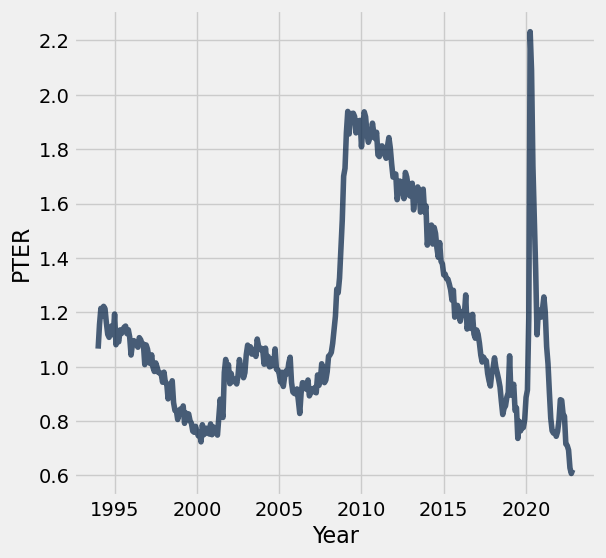

In [7]:
year = 1994 + np.arange(by_pter.num_rows)/12
pter_over_time = unemployment2023.with_column('PTER', pter).with_column('Year', year)
pter_over_time.plot('Year', 'PTER')

**Question 1.7.** Were PTER rates high during the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2009)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't. 

<!--
BEGIN QUESTION
name: q1_7
-->

In [8]:
highPTER = True

**Question 1.8.** During what other time period were PTER rates particularly high? Why would this have been the case?
<!--
BEGIN QUESTION
name: q1_8
-->

*2020- 2021 ish. This was during Covid, when the economy was at a standstill.*

## 2. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2021 and July 1, 2022. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [here](https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/state/totals/NST-EST2022-ALLDATA.csv).

The raw data is a bit messy - run the cell below to clean the table and make it easier to work with.

In [9]:
# Don't change this cell; just run it.
pop = Table.read_table('NST-EST2022-ALLDATA.csv').where('SUMLEV', 40).select([1, 4, 7, 8, 13, 16, 28, 31])
pop = pop.relabeled('POPESTIMATE2021', '2021').relabeled('POPESTIMATE2022', '2022')
pop = pop.relabeled('BIRTHS2021', 'BIRTHS').relabeled('DEATHS2021', 'DEATHS')
pop = pop.relabeled('NETMIG2021', 'MIGRATION').relabeled('RESIDUAL2021', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2021,2022,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"5,049,846","5,074,296","57,112","69,056","29,509",919
4,Alaska,"734,182","733,583","9,461","5,364","-2,693",-145
4,Arizona,"7,264,877","7,359,197","75,384","80,430","89,830",150
3,Arkansas,"3,028,122","3,045,637","35,115","40,174","18,786",200
4,California,"39,142,991","39,029,342","412,194","345,550","-414,830","-10,476"


**Question 2.1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?

<!--
BEGIN QUESTION
name: q2_1
-->

In [10]:
us_birth_rate = sum(pop.column('BIRTHS')) / sum(pop.column('2021'))
us_birth_rate

0.010740506382741485

**Question 2.2.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1.0%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

<!--
BEGIN QUESTION
name: q2_2
-->

In [11]:
migration_rates = pop.with_column('mig_rates', np.abs(pop.column('MIGRATION') / pop.column('2021')))
movers = len(migration_rates.where('mig_rates', are.above(0.01)))
movers

9

**Question 2.3.** Assign `south_births` to the total number of births that occurred in region 3 (the Southern US). 


<!--
BEGIN QUESTION
name: q2_3
-->

In [12]:
south_births = np.sum(pop.where('REGION', 3).column('BIRTHS'))
south_births

1425940

**Question 2.4.** Assign `more_than_NC_births` to the number of states that had a total number of births that was larger than the *total number of births in North Carolina* during this time interval.

<!--
BEGIN QUESTION
name: q2_4
-->

In [13]:
more_than_NC_births = len(pop.where('BIRTHS', are.above(pop.where('NAME', 'North Carolina').column('BIRTHS').item(0))))
more_than_NC_births

8

**Question 2.5.** In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?

1. Line Graph
<br>
2. Scatter Plot
<br>
3. Bar Chart

Assign `visualization` below to the number corresponding to the correct visualization.

<!--
BEGIN QUESTION
name: q2_5
-->

In [14]:
visualization = 2

**Question 2.6.** In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here.

<!--
BEGIN QUESTION
name: q2_6
manual: true
-->
<!-- EXPORT TO PDF -->

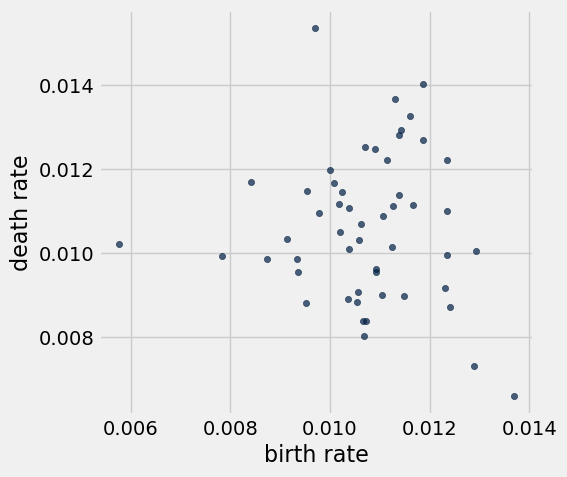

In [15]:
# Generate your chart in this cell
pop2 = pop.with_column('birth rate'
                       , (pop.column('BIRTHS') / pop.column('2021'))).with_column('death rate',
                                                                                  (pop.column('DEATHS') / pop.column('2021')))
pop2.scatter('birth rate', 'death rate')

**Question 2.7.** Is there an association between birth rate and death rate during this time interval? Describe the relationship shown in the chart. 
 

<!--
BEGIN QUESTION
name: q2_7
-->

*No, there's no relationship. The plots on the scatterplot are kind of all over the place, showing no correlation.*

## 3. Marginal Histograms


Consider the following scatter plot: 

![](hw03-scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given two histograms, each of which corresponds to either column `x` or column `y`. 

**Histogram A:** 
![](hw03-var1.png)


**Histogram B:** 
![](hw03-var2.png)

**Question 3.1.** Suppose we run `t.hist('y')`. Which histogram does this code produce? Assign `histogram_column_y` to either 1 or 2.

1. Histogram A
2. Histogram B

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [22]:
histogram_column_y = 1

**Question 3.2.** State at least one reason why you chose the histogram from Question 3.1. Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...").

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->
<!-- EXPORT TO PDF -->

*I chose Histogram A because looking from the yaxis of the scatterplot, there is a gap in plot points surrounding zero. Hist A does not show data surrounding zero as well.*

**Question 3.3.** Suppose we run `t.hist('x')`. Which histogram does this code produce? `Assign histogram_column_x` to either 1 or 2.

1. Histogram A
2. Histogram B

<!--
BEGIN QUESTION
name: q3_3
manual: false
-->

In [17]:
histogram_column_x = 2

**Question 3.4.** State at least one reason why you chose the histogram from Question 3.3.  Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...").

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->
<!-- EXPORT TO PDF -->

*I chose Histogram B because the distribution looks similar to the scatterplot from the viewpoint of the xaxis.*

## 4. Uber


Below we load tables each containing over 100,000 weekday Uber rides in the Atlanta and Los Angeles metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride, in minutes.

In [25]:
atlanta = Table.read_table("atlanta.csv")
los_angeles = Table.read_table("los_angeles.csv")
print("Atlanta Table")
atlanta.show(4)
print("Los Angeles Table")
los_angeles.show(4)

Atlanta Table


sourceid,dstid,hod,ride time
754,10,16,13.7982
776,418,22,12.5705
772,458,22,24.5393
764,538,22,23.1782


Los Angeles Table


sourceid,dstid,hod,ride time
506,478,2,5.78333
458,59,19,3.23133
454,99,19,22.4833
519,348,2,6.5735


**Question 4.1.** Produce a histogram of all ride times in Atlanta using the given bins. 

<!--
BEGIN QUESTION
name: q4_1
manual: true
-->

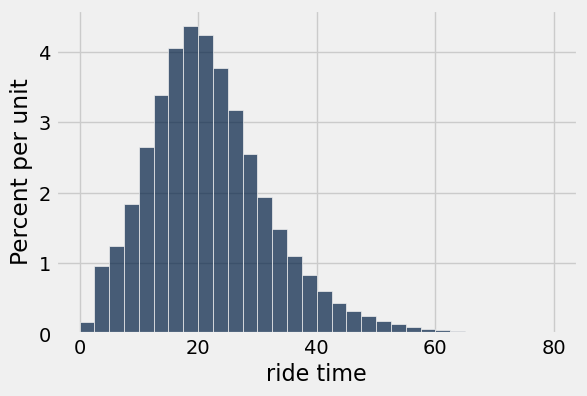

In [27]:
equal_bins = np.arange(0, 81, 2.5)
atlanta.hist('ride time', bins = equal_bins)

# Don't delete the following line!
plots.ylim(0, 0.046);

**Question 4.2.** Produce a histogram of all ride times in Los Angeles using the given bins.

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->

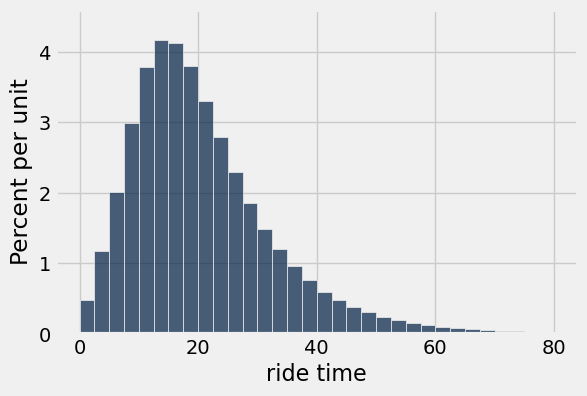

In [29]:
los_angeles.hist('ride time', bins = equal_bins)

# Don't delete the following line!
plots.ylim(0, 0.046);

**Question 4.3.** Assign `atlanta_10to15` and `los_angeles_10to15` to the percentage of rides that are 10-15 minutes long (including 10 but not including 15) in the respective metropolitan areas. Use the height variables provided below in order to compute the percentages. Your solution should only use height variables (heights of the bars of the histograms), numbers, and mathematical operations. You should not access the tables atlanta and los_angeles in any way.
<!--
BEGIN QUESTION
name: q4_3
manual: false
-->

In [30]:
atlanta_10to12_half_height = 0.02642
los_angeles_10to12_half_height = 0.03772
atlanta_12_half_to_15_height = 0.03393
los_angeles_12_half_to_15_height = 0.04160

atlanta_10to15 = atlanta_10to12_half_height + atlanta_12_half_to_15_height
los_angeles_10to15 = los_angeles_10to12_half_height + los_angeles_12_half_to_15_height

round(atlanta_10to15, 2), round(los_angeles_10to15, 2)

(0.06, 0.08)

**Question 4.4.** What are difference betweens the two histograms. What might be causing this?

**Hint:** Try thinking about external factors that may be causing the difference!

*LA people might use Uber only to go further distances because the public transit is more reliable than in Atlanta. Or the area of the city is larger.*

## 5. Bicycle Crashes in Chapel Hill

Dr. McLean lives not far from campus and is considering commuting from home to Hanes Hall on his bicycle. First he decides that he needs to investigate if it's safe to ride in Chapel Hill. Chapel Hill Open data provides a data set of all bicycle crashes reported in North Carolina (12,173 of them!) that occurred between 2007 and 2019. Begin by importing the dataset in the cell below.

In [31]:
Bike = Table.read_table('NCDOT_BikePedCrash.csv')
Bike.show(5)

X,Y,OBJECTID_1,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumBicsAin,NumBicsBin,NumBicsCin,NumBicsKil,NumBicsNoi,NumBicsTot,NumBicsUin,NumLanes,NumUnits,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID
-78.8839,36.0395,1,Yes,11,11-15,.,No,With Traffic,B: Suspected Minor Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,Male,Durham,Durham,No,Tuesday,Parallel Paths - Other Circumstances,16,101878313,Non-Intersection,January,B: Suspected Minor Injury,Bicyclist Ride Out - Parallel Path,2007,Residential,35,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,36.0395,Daylight,Urban (>70% Developed),-78.8839,.,.,.,.,.,.,.,1 lane,2,Straight - Level,Local Street,Dry,"Two-Way, Divided, Unprotected Median",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No,1
-78.7828,35.7511,2,Yes,20,20-24,.,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Hispanic,Male,Cary,Wake,No,Friday,Motorist Failed to Yield - Signalized Intersection,9,101885911,Intersection,January,C: Possible Injury,Motorist Drive Out - Right Turn on Red,2007,Residential,64,60-69,.,No,O: No Injury,White,Male,Passenger Car,No,35.7511,Daylight,Urban (>70% Developed),-78.7828,.,.,.,.,.,.,.,3 lanes,2,Straight - Grade,Local Street,Dry,"Two-Way, Divided, Unprotected Median",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,2
-80.6978,35.0847,3,Yes,37,30-39,.,No,Unknown,B: Suspected Minor Injury,Non-Roadway,Black,Male,Stallings,Union,No,Monday,Non-Roadway,17,101886055,Non-Roadway,January,B: Suspected Minor Injury,Non-Roadway,2007,Commercial,39,30-39,.,No,O: No Injury,White,Female,Passenger Car,No,35.0847,Dusk,Urban (>70% Developed),-80.6978,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Public Vehicular Area,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Cloudy,No,3
-80.4793,35.6844,4,Yes,30,30-39,.,No,With Traffic,C: Possible Injury,Travel Lane,White,Male,Salisbury,Rowan,No,Friday,Motorist Left Turn / Merge,17,101890155,Intersection,January,C: Possible Injury,Motorist Left Turn - Opposite Direction,2007,Commercial,999,Unknown,.,No,Unknown Injury,Unknown/Missing,Unknown,Sport Utility,Yes,35.6844,Daylight,Urban (>70% Developed),-80.4793,.,.,.,.,.,.,.,2 lanes,2,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Cloudy,No,4
-78.9045,34.9994,5,Yes,45,40-49,.,No,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,Male,Fayetteville,Cumberland,No,Friday,Motorist Overtaking Bicyclist,12,101899756,Non-Intersection,January,B: Suspected Minor Injury,Motorist Overtaking - Bicyclist Swerved,2007,Commercial,51,50-59,.,No,O: No Injury,Black,Female,Van,No,34.9994,Daylight,Urban (>70% Developed),-78.9044,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,5


**Question 5.1** Construct a new table `Bike_CH` that contains only the crashes that occurred in `Chapel Hill`. 

In [32]:
Bike_CH = Bike.where('City', 'Chapel Hill')
Bike_CH

X,Y,OBJECTID_1,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumBicsAin,NumBicsBin,NumBicsCin,NumBicsKil,NumBicsNoi,NumBicsTot,NumBicsUin,NumLanes,NumUnits,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID
-79.059,35.9183,284,Yes,12,11-15,.,No,Unknown,B: Suspected Minor Injury,Travel Lane,Black,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Sign-Controlled Intersection,16,102031450,Intersection,May,B: Suspected Minor Injury,Bicyclist Ride Through - Sign-Controlled Intersection,2007,Residential,22,20-24,.,No,O: No Injury,White,Male,Passenger Car,No,35.9183,Daylight,Urban (>70% Developed),-79.059,.,.,.,.,.,.,.,2 lanes,2,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Cloudy,No,284
-79.048,35.916,372,No,22,20-24,.,Yes,With Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,Male,Chapel Hill,Orange,Yes,Thursday,Motorist Failed to Yield - Sign-Controlled Intersection,23,102054187,Intersection,May,C: Possible Injury,Motorist Drive Out - Sign-Controlled Intersection,2007,Residential,48,40-49,.,No,O: No Injury,Black,Male,Sport Utility,No,35.916,Dark - Roadway Not Lighted,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,4 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Clear,No,372
-79.0551,35.9052,519,Yes,34,30-39,.,No,Facing Traffic,C: Possible Injury,Travel Lane,Asian,Male,Chapel Hill,Orange,No,Tuesday,Loss of Control / Turning Error,17,102085660,Intersection,July,C: Possible Injury,Bicyclist Turning Error - Left Turn,2007,Residential,39,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9052,Daylight,Urban (>70% Developed),-79.0551,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Rain,No,519
-79.0562,35.9099,763,No,53,50-59,.,No,With Traffic,C: Possible Injury,Unknown,White,Male,Chapel Hill,Orange,No,Wednesday,Motorist Left Turn / Merge,8,102136520,Non-Intersection,September,C: Possible Injury,Motorist Left Turn - Opposite Direction,2007,Residential,34,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9099,Daylight,Urban (>70% Developed),-79.0562,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,763
-79.0342,35.9292,824,Yes,18,16-19,.,No,With Traffic,B: Suspected Minor Injury,Unknown,White,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Signalized Intersection,14,102152366,Intersection,September,B: Suspected Minor Injury,Bicyclist Ride Out - Signalized Intersection,2007,Commercial,68,60-69,.,No,O: No Injury,White,Female,Passenger Car,No,35.9293,Daylight,Urban (>70% Developed),-79.0342,.,.,.,.,.,.,.,9 or more lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,824
-79.048,35.905,980,Yes,21,20-24,.,No,Unknown,B: Suspected Minor Injury,Multi-use Path,White,Male,Chapel Hill,Orange,No,Tuesday,Non-Roadway,18,102208751,Non-Roadway,December,B: Suspected Minor Injury,Non-Roadway,2007,Institutional,38,30-39,.,No,O: No Injury,Asian,Male,Passenger Car,No,35.9051,Dark - Lighted Roadway,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,1 lane,2,Straight - Grade,Public Vehicular Area,Dry,"One-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Piedmont,Urban,5 - 15 MPH,No Control Present,Clear,No,980
-79.0644,35.8916,1085,No,43,40

**Question 5.2** Use the `Bike_CH` table to determine the average number of reported bicycle crashes per year in Chapel Hill and assign this value to `ave_per_year`.

In [35]:
ave_per_year = np.average(Bike_CH.group('CrashYear').column('count'))
ave_per_year

11.923076923076923

Of the reported bicycle crashes that occurred in Chapel Hill, which of them occurred within 1.5 miles of Dr. McLean's office in Hanes Hall? Answering this question will take a few steps. Since the longitude (`X`) and latitude (`Y`) of each bicycle crash is listed in the table, we can use those to determine a distance from Hanes Hall. Googlemaps reports that the longitude and lattide of Hanes Hall is (-79.0513, 35.9107). To convert the differences in these latitudes and longitudes from Hanes Hall, we'll need to use Haversine's Formula.

### 5.1 Haversine Formula

It might seem straightforward to pull out a map and measure the distance between two distant points, however, the larger the distance the bigger the distortion caused by traveling on the curved surface of the Earth as opposed to flat 2D space. So while the distance you measure to your neighbouring town won't be too bad, if you're measuring between London and Rio the curvature of the Earth will make a big difference to the distance that you'll travel. To help figure out the correct distance there's the haversine formula.

The haversine formula allows you to calculate the shortest distance between two points on a sphere using their latitudes and longitudes — this will be the arc between them on the great circle that includes both points. A great circle is a circle on a sphere with the same center as the sphere, like the Equator. The haversine formula isn't perfect in practice, as Earth isn't a perfect sphere

https://sketchplanations.com/the-haversine-formula

<img src="haversine.png"/>

The formula itself is a bit complicated, so it's written for you in the cell below. The arguments are the latitude and longitudes of two points on earth, with the function returning the distance between them in kilometers. Run the cell below.

In [36]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

**Question 5.1.1.** Use the haversine formula to determine the distance in kilometers for the first bicycle crash in the `Bike_CH` table and Hanes Hall. Assign this value to `First_Crash_Distance`. 

Do we really need to consider the curvature of the Earth when traveling locally in Chapel Hill? **Absolutely not** ... but we're going to do it anyways!

In [38]:
First_Crash_Distance = haversine(Bike_CH.column('X').item(0), Bike_CH.column('Y').item(0), -79.0513, 35.9107)
First_Crash_Distance

1.0871866784104223

**Question 5.1.2.** Next you will determine the distance of each bicycle crash in the `Bike_CH` table from Hanes Hall. Begin by creating a table `Bike_CH_with_Hanes` that contains the same rows and columns as `Bike_CH`, and adds two new columns: `X Hanes` and `Y Hanes`. These columns will have the values for the longitude of Hanes Hall (`X Hanes`) and latitude of Hanes Hall (`Y Hanes`) repeated for each row of the column. To do this, you can use the *np.repeat*() function from numpy. This function takes in two arguments, first the value that you want to repeat, and then how many times you want to repeat it. For instance in the cell below an array is created by repeating 0 20 times.

In [61]:
np.repeat(0,20)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
Bike_CH_with_Hanes = Bike_CH.with_column('X Hanes', np.repeat(-79.0513, len(Bike_CH.column('X')))).with_column('Y Hanes', np.repeat(35.9107, len(Bike_CH.column('X'))))
Bike_CH_with_Hanes

X,Y,OBJECTID_1,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumBicsAin,NumBicsBin,NumBicsCin,NumBicsKil,NumBicsNoi,NumBicsTot,NumBicsUin,NumLanes,NumUnits,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID,X Hanes,Y Hanes
-79.059,35.9183,284,Yes,12,11-15,.,No,Unknown,B: Suspected Minor Injury,Travel Lane,Black,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Sign-Controlled Intersection,16,102031450,Intersection,May,B: Suspected Minor Injury,Bicyclist Ride Through - Sign-Controlled Intersection,2007,Residential,22,20-24,.,No,O: No Injury,White,Male,Passenger Car,No,35.9183,Daylight,Urban (>70% Developed),-79.059,.,.,.,.,.,.,.,2 lanes,2,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Cloudy,No,284,-79.0513,35.9107
-79.048,35.916,372,No,22,20-24,.,Yes,With Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,Male,Chapel Hill,Orange,Yes,Thursday,Motorist Failed to Yield - Sign-Controlled Intersection,23,102054187,Intersection,May,C: Possible Injury,Motorist Drive Out - Sign-Controlled Intersection,2007,Residential,48,40-49,.,No,O: No Injury,Black,Male,Sport Utility,No,35.916,Dark - Roadway Not Lighted,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,4 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Clear,No,372,-79.0513,35.9107
-79.0551,35.9052,519,Yes,34,30-39,.,No,Facing Traffic,C: Possible Injury,Travel Lane,Asian,Male,Chapel Hill,Orange,No,Tuesday,Loss of Control / Turning Error,17,102085660,Intersection,July,C: Possible Injury,Bicyclist Turning Error - Left Turn,2007,Residential,39,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9052,Daylight,Urban (>70% Developed),-79.0551,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Rain,No,519,-79.0513,35.9107
-79.0562,35.9099,763,No,53,50-59,.,No,With Traffic,C: Possible Injury,Unknown,White,Male,Chapel Hill,Orange,No,Wednesday,Motorist Left Turn / Merge,8,102136520,Non-Intersection,September,C: Possible Injury,Motorist Left Turn - Opposite Direction,2007,Residential,34,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9099,Daylight,Urban (>70% Developed),-79.0562,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,763,-79.0513,35.9107
-79.0342,35.9292,824,Yes,18,16-19,.,No,With Traffic,B: Suspected Minor Injury,Unknown,White,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Signalized Intersection,14,102152366,Intersection,September,B: Suspected Minor Injury,Bicyclist Ride Out - Signalized Intersection,2007,Commercial,68,60-69,.,No,O: No Injury,White,Female,Passenger Car,No,35.9293,Daylight,Urban (>70% Developed),-79.0342,.,.,.,.,.,.,.,9 or more lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,824,-79.0513,35.9107
-79.048,35.905,980,Yes,21,20-24,.,No,Unknown,B: Suspected Minor Injury,Multi-use Path,White,Male,Chapel Hill,Orange,No,Tuesday,Non-Roadway,18,102208751,Non-Roadway,December,B: Suspected Minor Injury,Non-Roadway,2007,Institutional,38,30-39,.,No,O: No Injury,Asian,Male,Passenger Car,No,35.9051,Dark - Lighted Roadway,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,1 lane,2,Straight - Grade,Public Vehicular Area,Dry,"One-Way, Not Divided",None,No Special Feature,Co

**Question 5.1.3.** Next you will use the `apply` function to determine the distances of each bicycle crash from Hanes Hall. Create a new table `Bike_CH_Dist_From_Hanes` which contains the same columns and rows as `Bike_CH_with_Hanes` as well as a new column `Distance From Hanes` which contains the values in kilometers for the distance from each bicycle accident from Hanes Hall. 

In [64]:
Bike_CH_Dist_From_Hanes = Bike_CH_with_Hanes.with_column(
    'Distance From Hanes',
    Bike_CH_with_Hanes.apply(haversine, 'X', 'Y', 'X Hanes', 'Y Hanes')
)
Bike_CH_Dist_From_Hanes

X,Y,OBJECTID_1,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumBicsAin,NumBicsBin,NumBicsCin,NumBicsKil,NumBicsNoi,NumBicsTot,NumBicsUin,NumLanes,NumUnits,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID,X Hanes,Y Hanes,Distance From Hanes
-79.059,35.9183,284,Yes,12,11-15,.,No,Unknown,B: Suspected Minor Injury,Travel Lane,Black,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Sign-Controlled Intersection,16,102031450,Intersection,May,B: Suspected Minor Injury,Bicyclist Ride Through - Sign-Controlled Intersection,2007,Residential,22,20-24,.,No,O: No Injury,White,Male,Passenger Car,No,35.9183,Daylight,Urban (>70% Developed),-79.059,.,.,.,.,.,.,.,2 lanes,2,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Cloudy,No,284,-79.0513,35.9107,1.08719
-79.048,35.916,372,No,22,20-24,.,Yes,With Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,Male,Chapel Hill,Orange,Yes,Thursday,Motorist Failed to Yield - Sign-Controlled Intersection,23,102054187,Intersection,May,C: Possible Injury,Motorist Drive Out - Sign-Controlled Intersection,2007,Residential,48,40-49,.,No,O: No Injury,Black,Male,Sport Utility,No,35.916,Dark - Roadway Not Lighted,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,4 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Clear,No,372,-79.0513,35.9107,0.664417
-79.0551,35.9052,519,Yes,34,30-39,.,No,Facing Traffic,C: Possible Injury,Travel Lane,Asian,Male,Chapel Hill,Orange,No,Tuesday,Loss of Control / Turning Error,17,102085660,Intersection,July,C: Possible Injury,Bicyclist Turning Error - Left Turn,2007,Residential,39,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9052,Daylight,Urban (>70% Developed),-79.0551,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Rain,No,519,-79.0513,35.9107,0.701111
-79.0562,35.9099,763,No,53,50-59,.,No,With Traffic,C: Possible Injury,Unknown,White,Male,Chapel Hill,Orange,No,Wednesday,Motorist Left Turn / Merge,8,102136520,Non-Intersection,September,C: Possible Injury,Motorist Left Turn - Opposite Direction,2007,Residential,34,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9099,Daylight,Urban (>70% Developed),-79.0562,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,763,-79.0513,35.9107,0.450427
-79.0342,35.9292,824,Yes,18,16-19,.,No,With Traffic,B: Suspected Minor Injury,Unknown,White,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Signalized Intersection,14,102152366,Intersection,September,B: Suspected Minor Injury,Bicyclist Ride Out - Signalized Intersection,2007,Commercial,68,60-69,.,No,O: No Injury,White,Female,Passenger Car,No,35.9293,Daylight,Urban (>70% Developed),-79.0342,.,.,.,.,.,.,.,9 or more lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,824,-79.0513,35.9107,2.57405
-79.048,35.905,980,Yes,21,20-24,.,No,Unknown,B: Suspected Minor Injury,Multi-use Path,White,Male,Chapel Hill,Orange,No,Tuesday,Non-Roadway,18,102208751,Non-Roadway,December,B: Suspected Minor Injury,Non-Roadway,2007,Institutional,38,30-39,.,No,O: No Injury,Asian,Male,Passenger Car,No,35.9051,Dark - Lighted Roadway,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,1 lane,2,Straight - Grade,Public Vehic

**Question 5.1.4** For the accidents in the `Bike_CH_with_Hanes` table that are within 1.5 miles of Hanes Hall, what proportion of them required an ambulance (`AmbulanceR`, `Yes`/`No`)? Note that the Haversine function calculates the distance in kilometers. One mile is approximately 1.60934 kilometers. Assign this value to `Prop_close_with_ambulance`.

In [65]:
Prop_close_with_ambulance = len(Bike_CH_Dist_From_Hanes.where(
    'Distance From Hanes',
    are.below(2.41)).where(
    'AmbulanceR',
    are.equal_to('Yes'))) / len(Bike_CH_Dist_From_Hanes.where(
    'Distance From Hanes',
    are.below(2.41)))
Prop_close_with_ambulance

1.0

Congratulations, you're done with homework 3!